In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION
import sklearn
from sklearn.linear_model import LogisticRegression
import pathlib
import random
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from seaborn import heatmap
tf.enable_eager_execution()
print(sklearn.__version__)


0.19.2


In [0]:
DATADIR = 'C:/Users/minhu/Desktop/msda/Bus235/dataset'
data_root = pathlib.Path(DATADIR)

In [0]:
# train
#prepare training arrays

data_root = pathlib.Path('C:/Users/minhu/Desktop/msda/Bus235/dataset')
training_objs = list(data_root.glob('train_data/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

X = []
Y = []

for i in range(len(training_objs)):
    img_raw = tf.read_file(training_objs[i])
    img_tensor = tf.image.decode_image(img_raw, channels=3)
    img_tensor = tf.image.rgb_to_grayscale(img_tensor)
    img_tensor = tf.reshape(img_tensor, [409600])

    a = np.array(img_tensor).tolist()
    X.append(a)
    Y.append(os.path.basename(training_objs[i])[0:8])


In [0]:
lr=LogisticRegression()

In [0]:
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
data_root = pathlib.Path('C:/Users/minhu/Desktop/msda/Bus235/dataset')
testing_objs = list(data_root.glob('test_data/*.png'))
testing_objs = [str(path) for path in testing_objs]
random.shuffle(testing_objs)

A = []
B = []

for i in range(len(testing_objs)):
    img_raw = tf.read_file(testing_objs[i])
    img_tensor = tf.image.decode_image(img_raw, channels=3)
    img_tensor = tf.image.rgb_to_grayscale(img_tensor)
    img_tensor = tf.reshape(img_tensor, [409600])

    a = np.array(img_tensor).tolist()
    A.append(a)
    B.append(os.path.basename(testing_objs[i])[0:8])

In [0]:
#number of test images

len(testing_objs)

409

In [0]:
predictions = lr.predict(A)

In [0]:
print(lr.score(A,B))

0.6479217603911981


In [0]:
def grid(X,Y,inds,n_col,predictions):  #print out randomly selected images and their labels
    N = len(inds)
    n_row = int(1.0*N/n_col)
    fig = plt.figure(figsize=(15, 15))
    for j in range(n_row):
        for k in range(n_col):
            i_inds = (j*n_col)+k
            i_data = inds[i_inds]

            if i_inds < N:
                rgb = np.array(A[i_data])
                label =Y[i_data] 
                img = rgb.reshape(640,640)
                fig.add_subplot(n_row,n_col, i_inds+1)
                pred = predictions[i_data]
                import matplotlib.image as mpimg
                img=mpimg.imread(testing_objs[i_data])
                plt.imshow(img, interpolation='nearest')
                plt.title("actual: {}\n predict: {}".format(label,pred))

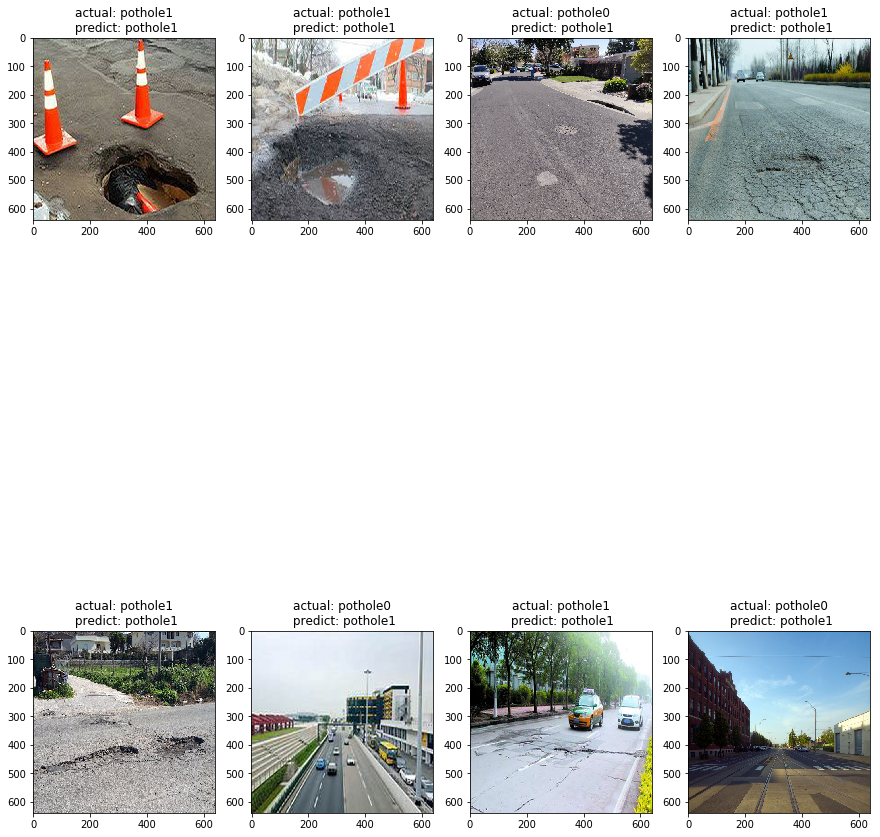

In [0]:
indices = [np.random.choice(range(len(A))) for j in range(8)]
grid(A,B, indices,4,predictions)

In [0]:
# Save the model as a pickle in a file 
joblib.dump(lr, 'lr2.pkl')   


['lr2.pkl']

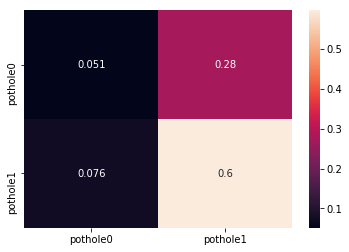

In [0]:
heatmap(mat/len(testing_objs),annot=True,xticklabels=['pothole0','pothole1'],yticklabels=['pothole0','pothole1'])

In [0]:
cr=classification_report(B,predictions)
print(cr)

             precision    recall  f1-score   support

   pothole0       0.40      0.16      0.23       134
   pothole1       0.68      0.89      0.77       275

avg / total       0.59      0.65      0.59       409

